This is a short report for all the data for the test duration in my living room.

In [1]:
import pandas as pd

file_path = 'feeds.csv'

df = pd.read_csv(file_path)

df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,2024-11-25T19:09:51+00:00,1,22,53,33.6746,1072,0,NaN,NaN,NaN,NaN
1,2024-11-25T19:10:08+00:00,2,22,53,33.6746,1264,0,NaN,NaN,NaN,NaN
2,2024-11-25T19:10:29+00:00,3,22,53,151.5360,1280,0,NaN,NaN,NaN,NaN
3,2024-11-25T19:10:48+00:00,4,22,53,33.6746,1264,0,NaN,NaN,NaN,NaN
4,2024-11-25T19:11:08+00:00,5,22,53,33.6746,1184,0,NaN,NaN,NaN,NaN


In [2]:
df = df.drop(['latitude', 'longitude', 'elevation', 'status', 'entry_id'], axis=1)

df = df.rename(columns={'field1': 'Temperature', 
                       'field2': 'Humidity', 
                       'field3': 'Distance', 
                       'field4': 'Light Value', 
                       'field5': 'Voltage'})

df.head()


,created_at,Temperature,Humidity,Distance,Light Value,Voltage
0,2024-11-25T19:09:51+00:00,22,53,33.6746,1072,0
1,2024-11-25T19:10:08+00:00,22,53,33.6746,1264,0
2,2024-11-25T19:10:29+00:00,22,53,151.5360,1280,0
3,2024-11-25T19:10:48+00:00,22,53,33.6746,1264,0
4,2024-11-25T19:11:08+00:00,22,53,33.6746,1184,0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_timeseries(df, date_column='date'):
    """
    Read a CSV file and create separate plots for each numeric column over time.
    
    Parameters:
    df (pd df): pandas dataframe to visualize
    date_column (str): Name of the column containing dates
    """
    
    # Convert date column to datetime if it's not already
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Get list of numeric columns excluding the date column
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_columns = [col for col in numeric_columns if col != date_column]
    
    # Calculate the number of rows and columns for the subplot grid
    n_plots = len(numeric_columns)
    n_rows = (n_plots + 1) // 2  # Round up division
    n_cols = min(2, n_plots)  # Use 2 columns unless there's only 1 plot
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    fig.suptitle('Time Series Data Visualization', fontsize=16, y=1.02)
    
    # Make axes iterable even if there's only one plot
    if n_plots == 1:
        axes = [axes]
    elif n_plots == 2:
        axes = axes.ravel()
    else:
        axes = axes.ravel()
    
    # Create a plot for each numeric column
    for i, column in enumerate(numeric_columns):
        ax = axes[i]
        
        # Plot the data
        ax.plot(df[date_column], df[column], linewidth=2)
        
        # Customize the plot
        ax.set_title(f'{column} over Time')
        ax.set_xlabel('Date')
        ax.set_ylabel(column)
        ax.grid(True)
        
        # Rotate x-axis labels for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
    
    # Remove any empty subplots
    for i in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[i])
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    return fig

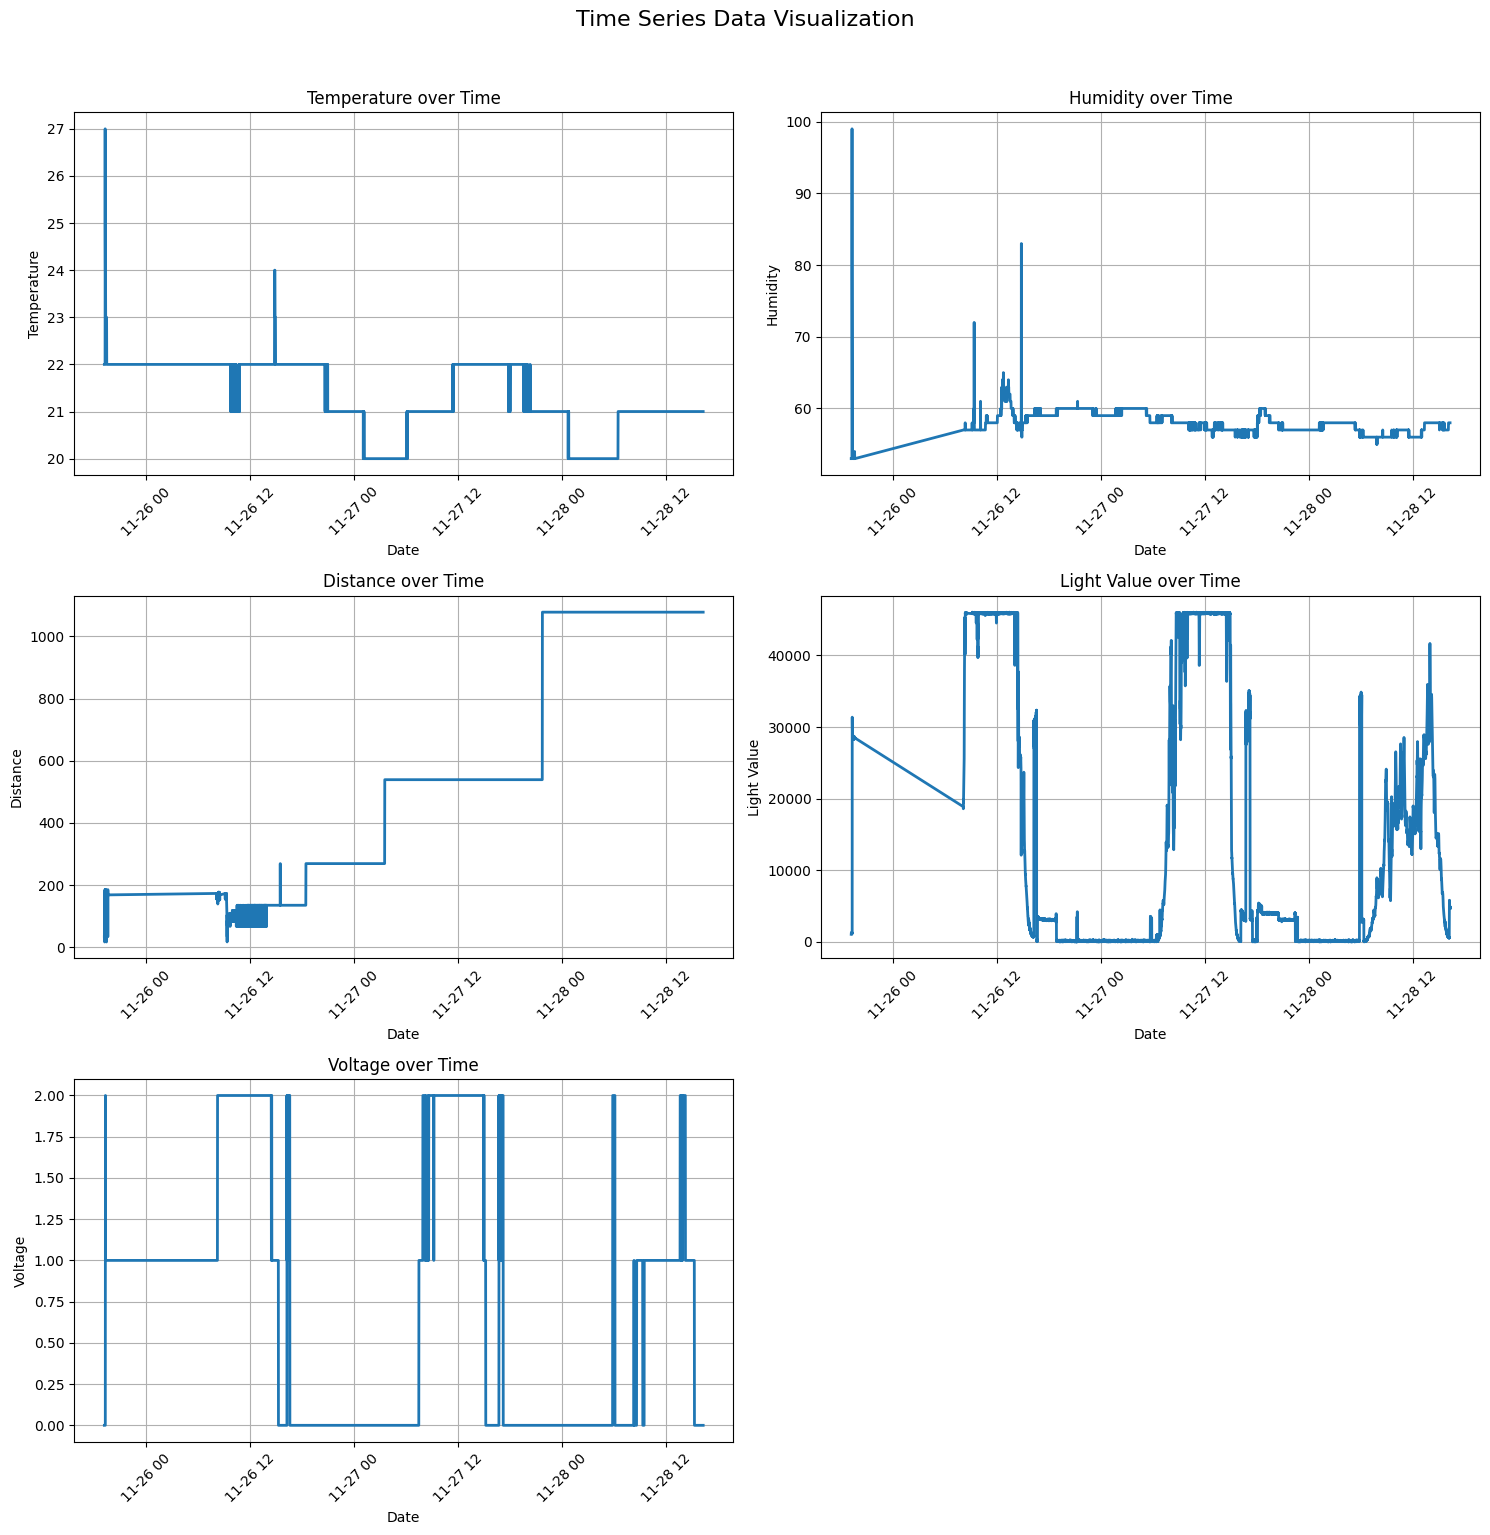

In [4]:
fig = plot_timeseries(df, 'created_at')
plt.show()